codigo maquina
metricas de clustering

metodo elbow
buscar la mejor configuracion del k y por q

------------------------------------
entrega 3 ....
3 modelos k-means
3 clustering jerarquico

PCA (modelo de reduccion de la dimensionalidad):TOMA TODAS LAS VARIABLES Y ANALIZA LA varianza y COVARIANZA(DIsTRIBUCION CONJUNTa).y las transforma en 4(ej) componentes ppales y explica el 80% de las varianza del modleo de la informacion.


BASADO EN : Clustering con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html

# Cálculo de Distancias

El set de datos **USArrests** contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP). Empleando estas variables, se pretende calcular una matriz de distancias que permita identificar los estados más similares.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [11]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [15]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [16]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.iloc[:4,:4]

------------------
Distancia euclídea
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN
Arkansas,1.302905,2.854730,2.74535,NaN


In [ ]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124


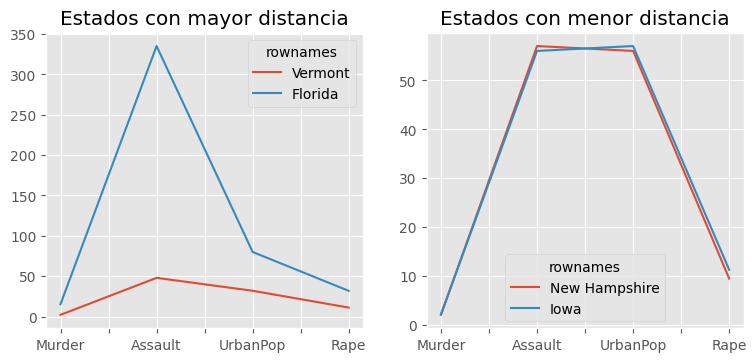

In [ ]:
# Estados con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(9, 3.84))
datos.loc[['Vermont', 'Florida']].transpose().plot(ax= axs[0])
axs[0].set_title('Estados con mayor distancia')
datos.loc[['New Hampshire', 'Iowa']].transpose().plot(ax= axs[1])
axs[1].set_title('Estados con menor distancia');

# EJERCICIO

Dos de las librerías de python que implementan las distancias  (junto con otras) son **sklearn.metrics.pairwise_distances** y **scipy.spatial.distance**.

En concreto, **sklearn** permite calcular las distancias: ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’ y ‘yule’.

A partir de los datos de **USArrests** y tomando como guía el ejemplo anterior, calcule a lo menos 4 distancias con distintos métodos y grafique las respectivas similaridades.

In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia Manhattan')
print('------------------')
distancias_manhattan = pairwise_distances(
                X      = datos_scaled,
                metric ='manhattan'
             )

# Se descarta la diagonal superior de la matriz
distancias_manhattan[np.triu_indices(n=distancias_manhattan.shape[0])] = np.nan

distancias_manhattan = pd.DataFrame(
                distancias_manhattan,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_manhattan.iloc[:4,:4]

------------------
Distancia Manhattan
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,4.280180,NaN,NaN,NaN
Arizona,4.478083,4.505562,NaN,NaN
Arkansas,2.319686,3.998950,4.756827,NaN


In [ ]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(3)

In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cosine')
print('------------------')
distancias_cosine = pairwise_distances(
                X      = datos_scaled,
                metric ='cosine'
             )

# Se descarta la diagonal superior de la matriz
distancias_cosine[np.triu_indices(n=distancias_cosine.shape[0])] = np.nan

distancias_cosine = pd.DataFrame(
                distancias_cosine,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_cosine.iloc[:4,:4]

------------------
Distancia cosine
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,0.549507,NaN,NaN,NaN
Arizona,0.775744,0.511214,NaN,NaN
Arkansas,0.419331,0.646351,1.385628,NaN


In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia cityblock')
print('------------------')
distancias_cityblock = pairwise_distances(
                X      = datos_scaled,
                metric ='cityblock'
             )

# Se descarta la diagonal superior de la matriz
distancias_cityblock[np.triu_indices(n=distancias_cityblock.shape[0])] = np.nan

distancias_cityblock = pd.DataFrame(
                distancias_cityblock,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_cityblock.iloc[:4,:4]

------------------
Distancia cityblock
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,4.280180,NaN,NaN,NaN
Arizona,4.478083,4.505562,NaN,NaN
Arkansas,2.319686,3.998950,4.756827,NaN


In [ ]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia canberra')
print('------------------')
distancias_canberra = pairwise_distances(
                X      = datos_scaled,
                metric ='canberra'
             )

# Se descarta la diagonal superior de la matriz
distancias_canberra[np.triu_indices(n=distancias_canberra.shape[0])] = np.nan

distancias_canberra = pd.DataFrame(
                distancias_canberra,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias_canberra.iloc[:4,:4]

------------------
Distancia canberra
------------------


rownames,Alabama,Alaska,Arizona,Arkansas
rownames,,,,
Alabama,NaN,NaN,NaN,NaN
Alaska,1.989902,NaN,NaN,NaN
Arizona,3.198710,2.305283,NaN,NaN
Arkansas,2.539778,2.087494,3.258628,NaN


14/11/2024
dbscan
k-means

#**DBSCAN**

          Murder  Assault  UrbanPop  Rape
rownames                                 
Alabama     13.2      236        58  21.2
Alaska      10.0      263        48  44.5
Arizona      8.1      294        80  31.0
Arkansas     8.8      190        50  19.5


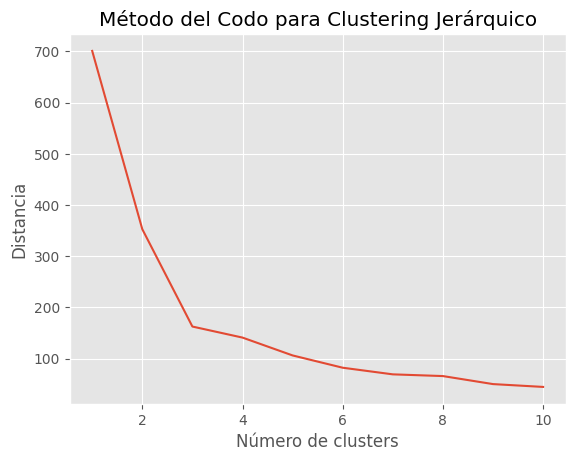

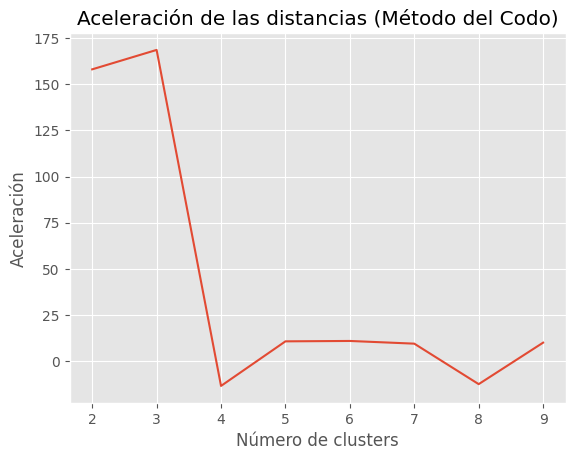

El número óptimo de clusters es: 3


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# Cargar el dataset USArrests
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

# Ver los primeros registros del dataset (opcional, solo para revisar)
print(datos.head(4))

# Calcular la matriz de distancias entre las observaciones
dist_matrix = pdist(datos, metric='euclidean')

# Aplicar el algoritmo de clustering jerárquico (linkage)
Z = linkage(dist_matrix, method='ward')

# Método del Codo - calcular la distancia de enlace
last = Z[-10:, 2]  # Últimos 10 valores de distancia
last_rev = last[::-1]  # Invertir para tener el gráfico correcto
idxs = np.arange(1, len(last) + 1)

# Graficar las distancias
plt.plot(idxs, last_rev)
plt.xlabel('Número de clusters')
plt.ylabel('Distancia')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

# Calcular la aceleración de las distancias (segunda derivada)
acceleration = np.diff(last, 2)  # Segunda derivada de las distancias
acceleration_rev = acceleration[::-1]

# Graficar la aceleración
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xlabel('Número de clusters')
plt.ylabel('Aceleración')
plt.title('Aceleración de las distancias (Método del Codo)')
plt.show()

# Encontrar el punto óptimo (el codo)
k = acceleration_rev.argmax() + 2  # El índice donde la aceleración es máxima + 2
print(f"El número óptimo de clusters es: {k}")


In [31]:
# se pueden definir varios parametros. Pruebe con varios para ver como cambia la nube de puntos.
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std = 0.5, random_state=0)

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [33]:
clustering = DBSCAN(eps=2, min_samples=2).fit(X)

# con esto obtenemos las etiquetas de cada puntos que asigno el algoritmo
labels_DBSCAN = clustering.labels_
labels_DBSCAN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

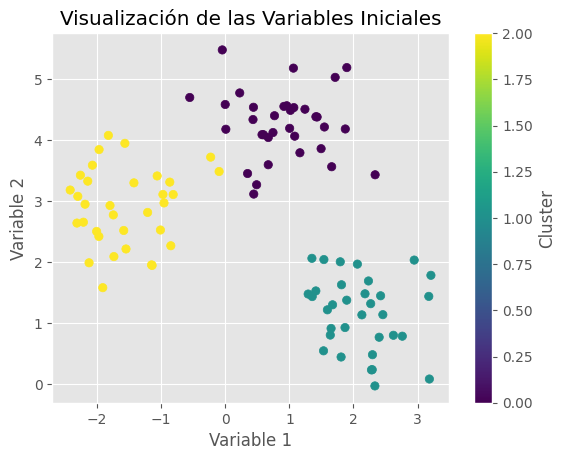

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c= y, cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Visualización de las Variables Iniciales')
plt.colorbar(label='Cluster')
plt.show()


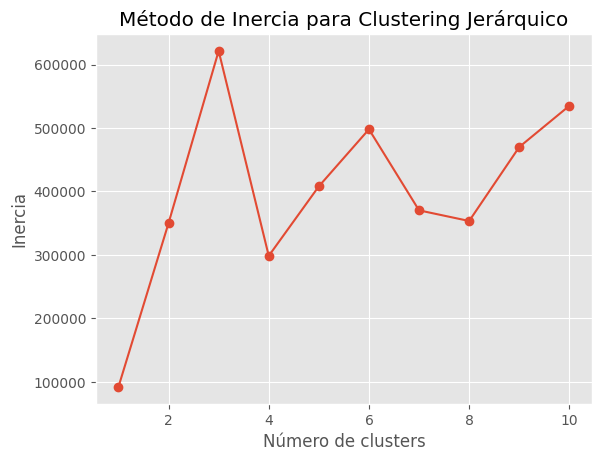

In [37]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

# Función para calcular la inercia
def calculate_inertia(X, labels):
    centroids, _ = pairwise_distances_argmin_min(np.array([X[labels == i].mean(axis=0) for i in np.unique(labels)]), X)
    inertia = sum((X[i] - centroids[labels[i]]) ** 2 for i in range(X.shape[0]))
    return inertia.sum()

# Calcular la inercia para diferentes números de clusters
inertias = []
for n_clusters in range(1, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X)
    inertia = calculate_inertia(X, labels)
    inertias.append(inertia)

# Graficar el método de inercia
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método de Inercia para Clustering Jerárquico')
plt.show()

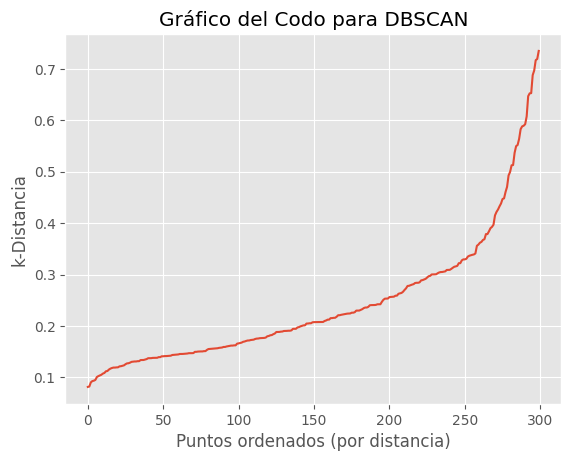

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# Calcular k-vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar las distancias
distances = np.sort(distances[:, 4], axis=0)

# Graficar el gráfico del codo para encontrar el valor óptimo de epsilon
plt.plot(distances)
plt.ylabel('k-Distancia')
plt.xlabel('Puntos ordenados (por distancia)')
plt.title('Gráfico del Codo para DBSCAN')
plt.show()

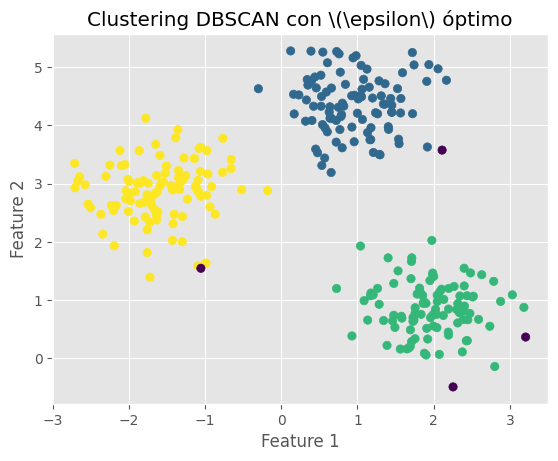

In [41]:
from sklearn.cluster import DBSCAN

# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 0.5 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=5)
labels = dbscan.fit_predict(X)

# Graficar resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering DBSCAN con \(\epsilon\) óptimo')
plt.show()

#K-MEANS

          Murder  Assault  UrbanPop  Rape
rownames                                 
Alabama     13.2      236        58  21.2
Alaska      10.0      263        48  44.5
Arizona      8.1      294        80  31.0
Arkansas     8.8      190        50  19.5


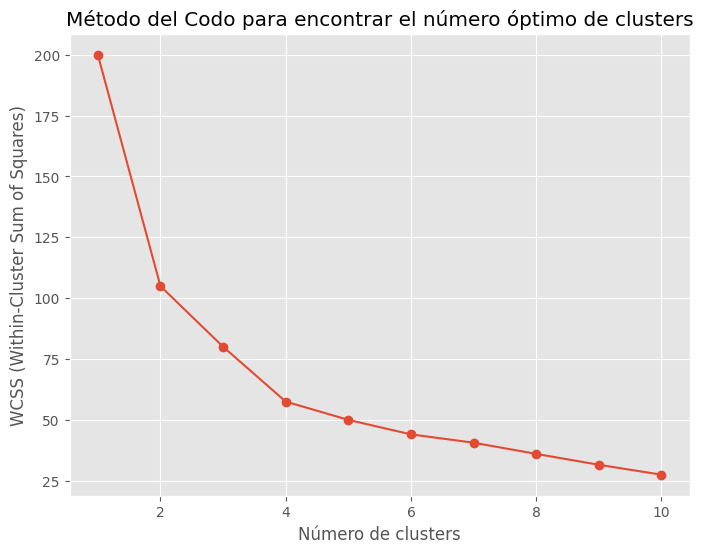

             Murder  Assault  UrbanPop  Rape  Cluster
rownames                                             
Alabama        13.2      236        58  21.2        1
Alaska         10.0      263        48  44.5        3
Arizona         8.1      294        80  31.0        3
Arkansas        8.8      190        50  19.5        1
California      9.0      276        91  40.6        3
Colorado        7.9      204        78  38.7        3
Connecticut     3.3      110        77  11.1        0
Delaware        5.9      238        72  15.8        0
Florida        15.4      335        80  31.9        3
Georgia        17.4      211        60  25.8        1
Centroides de los clusters:
     Murder   Assault  UrbanPop      Rape
0 -0.494407 -0.386484  0.581676 -0.264310
1  1.426224  0.883211 -0.822791  0.019467
2 -0.971303 -1.117836 -0.939550 -0.976578
3  0.702127  1.049994  0.729974  1.289904


In [48]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Cargar los datos 'USArrests'
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

# Ver los primeros 4 registros
print(datos.head(4))

# Paso 1: Preprocesar los datos
# - Escalar los datos (muy importante para K-Means)
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

# Paso 2: Determinar el número óptimo de clusters (usando el método del codo)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(datos_escalados)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Paso 3: Aplicar K-Means con el número óptimo de clusters
# De acuerdo con el gráfico, supongamos que el número óptimo de clusters es 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(datos_escalados)

# Añadir las etiquetas de los clusters al dataframe original
datos['Cluster'] = kmeans.labels_

# Mostrar los primeros registros con las etiquetas de los clusters
print(datos.head(10))


# Paso 5: Ver los centros de los clusters
# Los centroides de los clusters en el espacio original de 4 dimensiones
centroides = kmeans.cluster_centers_

# Mostrar los centroides de los clusters
centroides_df = pd.DataFrame(centroides, columns=datos.columns[:-1])
print("Centroides de los clusters:")
print(centroides_df)

